# Inferencia Estadística Aplicada a Machine Learning

La inferencia estadística se utiliza para extraer conclusiones sobre una población a partir de una muestra. En el contexto de Machine Learning, es fundamental para:

- Estimar parámetros poblacionales (por ejemplo, la media).
- Calcular intervalos de confianza para dichos parámetros.
- Evaluar la precisión de las estimaciones a través del error estándar.
- Realizar pruebas de hipótesis para determinar si existen diferencias significativas o efectos en los datos.

En este Notebook se presentan los conceptos teóricos, fórmulas, ejemplos prácticos y un caso real aplicado a Machine Learning.

## 1. Conceptos Teóricos

### a) Intervalo de Confianza (IC)

Un **intervalo de confianza** es un rango de valores, calculado a partir de una muestra, que se espera contenga el valor verdadero de un parámetro poblacional con un cierto nivel de confianza (por ejemplo, 95%).

La fórmula básica para un intervalo de confianza de la media es:

$$ IC = \bar{x} \pm t_{\alpha/2,\,n-1} \left(\frac{s}{\sqrt{n}}\right) $$

donde:

- \($\bar{x}$\) es la media muestral.
- \(s\) es la desviación estándar muestral.
- \(n\) es el tamaño de la muestra.
- \($t_{\alpha/2,\,n-1}$\) es el valor crítico de la distribución *t* de Student para un nivel de significancia \($\alpha$\) y \(n-1\) grados de libertad.

### b) Error Estándar (EE)

El **error estándar** es una medida de la variabilidad de la media muestral, y se define como:

$$ EE = \frac{s}{\sqrt{n}} $$

donde:

- \(s\) es la desviación estándar muestral.
- \(n\) es el tamaño de la muestra.

### c) Prueba de Hipótesis

Una **prueba de hipótesis** es un procedimiento para determinar si existe suficiente evidencia en una muestra de datos para inferir que cierta condición es verdadera para la población.

Ejemplo: La prueba *t* para una muestra se utiliza para comparar la media muestral con un valor hipotético \($\mu_0$\):

$$ t = \frac{\bar{x} - \mu_0}{s/\sqrt{n}} $$

donde:

- \($\bar{x}$\) es la media muestral.
- \($\mu_0$\) es la media bajo la hipótesis nula.
- \(s\) es la desviación estándar muestral.
- \(n\) es el tamaño de la muestra.

Se compara el valor \(t\) obtenido con un valor crítico de la distribución *t* para decidir si se rechaza la hipótesis nula.

## 2. Ejemplos Prácticos en Python

A continuación se presentan tres ejemplos prácticos para cada uno de los conceptos: Intervalo de Confianza, Error Estándar y Prueba de Hipótesis.

### Ejemplo 1: Intervalo de Confianza para la Media

Supongamos que tenemos una muestra de datos y queremos estimar la media poblacional con un 95% de confianza.

Se utilizará la siguiente fórmula:

$$ IC = \bar{x} \pm t_{0.025,\,n-1} \left(\frac{s}{\sqrt{n}}\right) $$

Ejemplo práctico:

In [ ]:
import numpy as np
from scipy import stats

# Datos de ejemplo: muestra de 30 observaciones
np.random.seed(42)
datos = np.random.normal(loc=50, scale=10, size=30)

# Cálculo de la media, desviación estándar y tamaño de la muestra
media_muestral = np.mean(datos)
s = np.std(datos, ddof=1)  # ddof=1 para la desviación estándar muestral
n = len(datos)

# Valor crítico t para un intervalo del 95% (alpha=0.05)
t_crit = stats.t.ppf(1-0.025, df=n-1)
                # ppf - Encuentra el valor t crítico dado un percentil q

# Error estándar
EE = s / np.sqrt(n)

# Cálculo del intervalo de confianza
IC_lower = media_muestral - t_crit * EE
IC_upper = media_muestral + t_crit * EE

print(f"Media muestral: {media_muestral:.2f}")
print(f"Error Estándar: {EE:.2f}")
print(f"Intervalo de Confianza (95%): [{IC_lower:.2f}, {IC_upper:.2f}]")

Media muestral: 48.12
Error Estándar: 1.64
Intervalo de Confianza (95%): [44.76, 51.48]


### Ejemplo 2: Cálculo del Error Estándar

Utilizando los mismos datos del ejemplo anterior, se puede calcular el error estándar de la media.

La fórmula es:

$$ EE = \frac{s}{\sqrt{n}} $$

Donde \(s\) es la desviación estándar muestral y \(n\) es el tamaño de la muestra.

In [ ]:
# Utilizando los mismos datos de ejemplo
print(f"Error Estándar calculado: {EE:.2f}")

# Ejemplo adicional: comparar error estándar con diferentes tamaños de muestra
for n_samples in [30, 50, 100]:
    datos_sample = np.random.normal(loc=50, scale=10, size=n_samples)
    s_sample = np.std(datos_sample, ddof=1)
    EE_sample = s_sample / np.sqrt(n_samples)
    print(f"n = {n_samples} -> EE = {EE_sample:.2f}")

# Ante varios tamaños de muestra podemos ver que a medida que el tamaño de la muestra crece,
# el error estándar disminuye, ie, mejora la precisión de la estimación de la media poblacional.

Error Estándar calculado: 1.64
n = 30 -> EE = 1.70
n = 50 -> EE = 1.27
n = 100 -> EE = 1.02


### Ejemplo 3: Prueba de Hipótesis (Prueba t para una muestra)

Supongamos que queremos determinar si la media poblacional es igual a un valor hipotético \($\mu_0$ = 52\). Utilizaremos la prueba t para una muestra, cuya fórmula es:

$$ t = \frac{\bar{x} - \mu_0}{s/\sqrt{n}} $$

Donde:

- \($\bar{x}$\) es la media muestral.
- \($\mu_0$\) es la media bajo la hipótesis nula.
- \(s\) es la desviación estándar muestral.
- \(n\) es el tamaño de la muestra.

Luego se compara el valor \(t\) obtenido con el valor crítico de la distribución *t* para decidir si se rechaza la hipótesis nula.

In [ ]:
# Hipótesis:
# H0: mu = 52 (la media poblacional es 52)
# H1: mu != 52 (la media poblacional es diferente de 52)

mu_0 = 52
t_stat = (media_muestral - mu_0) / EE
df = n - 1
p_value = 2 * (1 - stats.t.cdf(abs(t_stat), df=df))

print(f"t estadístico: {t_stat:.2f}")
print(f"t ecrítico: {t_crit:.2f}")
print(f"Grados de libertad: {df}")
print(f"p-valor: {p_value:.4f}")

if p_value < 0.05:
    print("Se rechaza la hipótesis nula. La media es significativamente diferente de 52.")
else:
    print("No se rechaza la hipótesis nula. No hay evidencia suficiente para decir que la media difiere de 52.")

# También podemos observar que |t_test| > t_crit, por lo que se tiene suficiente evidencia estadística para
# rechazar H0

t estadístico: -2.36
t ecrítico: 2.05
Grados de libertad: 29
p-valor: 0.0251
Se rechaza la hipótesis nula. La media es significativamente diferente de 52.


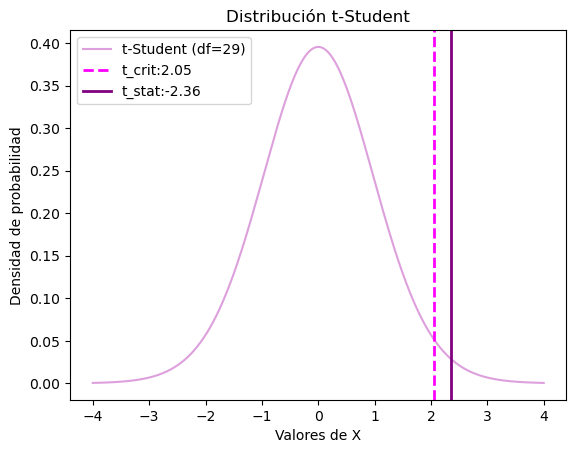

In [ ]:
import matplotlib.pyplot as plt

# Generar valores para el eje X
x = np.linspace(-4, 4, 1000)

# Calcular la función de densidad de probabilidad (PDF)
y = stats.t.pdf(x, df)

# Graficar distribución t-student
plt.plot(x, y, label=f't-Student (df={df})', color='plum')
# Agregamos una línea vertical con el t_crit y el t_stat
plt.axvline(t_crit, color='magenta', linestyle='--', linewidth=2, label=f't_crit:{t_crit:.2f}')
plt.axvline(np.abs(t_stat), color='purple', linewidth=2, label=f't_stat:{t_stat:.2f}')

# Agregar título y etiquetas
plt.title('Distribución t-Student')
plt.xlabel('Valores de X')
plt.ylabel('Densidad de probabilidad')

# Agregar leyenda
plt.legend()

# Mostrar la gráfica
plt.show()

## 3. Ejemplo Real Aplicado a Machine Learning: Evaluación de Diferencias en el Dataset Iris

En este ejemplo se utilizará el dataset **Iris** para evaluar si existe una diferencia significativa en la longitud del pétalo entre dos clases (por ejemplo, clase 0 y clase 1). Esto se realizará mediante:

1. Calcular las estadísticas descriptivas (media, desviación estándar) para la característica *petal length (cm)* en ambas clases.
2. Calcular el intervalo de confianza para la media de cada grupo.
3. Realizar una prueba t de dos muestras para determinar si la diferencia de medias es significativa.

¡Comencemos!

In [11]:
import pandas as pd
from sklearn import datasets

# Cargar el dataset Iris
iris = datasets.load_iris()
df_iris = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df_iris['target'] = iris.target

# Seleccionar las dos clases (por ejemplo, 0 y 1) y la característica 'petal length (cm)'
grupo0 = df_iris[df_iris['target'] == 0]['petal length (cm)']
grupo1 = df_iris[df_iris['target'] == 1]['petal length (cm)']

# Estadísticas descriptivas
media0 = grupo0.mean()
s0 = grupo0.std(ddof=1)
n0 = grupo0.count()

media1 = grupo1.mean()
s1 = grupo1.std(ddof=1)
n1 = grupo1.count()

print("Estadísticas para Grupo 0 (target = 0):")
print(f"Media: {media0:.2f}, Desviación Estándar: {s0:.2f}, n = {n0}")

print("\nEstadísticas para Grupo 1 (target = 1):")
print(f"Media: {media1:.2f}, Desviación Estándar: {s1:.2f}, n = {n1}")

# Intervalo de confianza para cada grupo (95% de confianza)
t_crit0 = stats.t.ppf(1-0.025, df=n0-1)
EE0 = s0 / np.sqrt(n0)
IC0 = (media0 - t_crit0 * EE0, media0 + t_crit0 * EE0)

t_crit1 = stats.t.ppf(1-0.025, df=n1-1)
EE1 = s1 / np.sqrt(n1)
IC1 = (media1 - t_crit1 * EE1, media1 + t_crit1 * EE1)

print("\nIntervalo de confianza (95%) para Grupo 0:", IC0)
print("Intervalo de confianza (95%) para Grupo 1:", IC1)

# Prueba t de dos muestras (suponiendo varianzas desiguales)
t_stat, p_valor = stats.ttest_ind(grupo0, grupo1, equal_var=False)

print("\nPrueba t para comparar las medias de 'petal length (cm)' entre Grupo 0 y Grupo 1:")
print(f"t estadístico: {t_stat:.2f}")
print(f"p-valor: {p_valor:.4f}")

if p_valor < 0.05:
    print("Se rechaza la hipótesis nula: existen diferencias significativas en la longitud del pétalo entre los grupos.")
else:
    print("No se rechaza la hipótesis nula: no se observan diferencias significativas en la longitud del pétalo entre los grupos.")

Estadísticas para Grupo 0 (target = 0):
Media: 1.46, Desviación Estándar: 0.17, n = 50

Estadísticas para Grupo 1 (target = 1):
Media: 4.26, Desviación Estándar: 0.47, n = 50

Intervalo de confianza (95%) para Grupo 0: (1.4126452382875103, 1.51135476171249)
Intervalo de confianza (95%) para Grupo 1: (4.126452777905478, 4.393547222094521)

Prueba t para comparar las medias de 'petal length (cm)' entre Grupo 0 y Grupo 1:
t estadístico: -39.49
p-valor: 0.0000
Se rechaza la hipótesis nula: existen diferencias significativas en la longitud del pétalo entre los grupos.


In [12]:
# Replicamos para sepal length
# Seleccionar las dos clases (por ejemplo, 0 y 1) y la característica 'sepal length (cm)'
grupo0s = df_iris[df_iris['target'] == 0]['sepal length (cm)']
grupo1s = df_iris[df_iris['target'] == 1]['sepal length (cm)']

# Estadísticas descriptivas
media0s = grupo0s.mean()
s0s = grupo0s.std(ddof=1)
n0s = grupo0s.count()

media1s = grupo1s.mean()
s1s = grupo1s.std(ddof=1)
n1s = grupo1s.count()

print("Estadísticas para Grupo 0 (target = 0):")
print(f"Media: {media0s:.2f}, Desviación Estándar: {s0s:.2f}, n = {n0s}")

print("\nEstadísticas para Grupo 1 (target = 1):")
print(f"Media: {media1s:.2f}, Desviación Estándar: {s1s:.2f}, n = {n1s}")

# Intervalo de confianza para cada grupo (95% de confianza)
t_crit0_s = stats.t.ppf(1-0.025, df=n0s-1)
EE0_s = s0s / np.sqrt(n0s)
IC0_s = (media0s - t_crit0_s * EE0_s, media0s + t_crit0_s * EE0_s)

t_crit1_s = stats.t.ppf(1-0.025, df=n1s-1)
EE1_s = s1s / np.sqrt(n1s)
IC1_s = (media1s - t_crit1_s * EE1_s, media1s + t_crit1_s * EE1_s)

print("\nIntervalo de confianza (95%) para Grupo 0:", IC0_s)
print("Intervalo de confianza (95%) para Grupo 1:", IC1_s)

# Prueba t de dos muestras (suponiendo varianzas desiguales)
t_stat_s, p_valor_s = stats.ttest_ind(grupo0s, grupo1s, equal_var=False)

print("\nPrueba t para comparar las medias de 'sepal length (cm)' entre Grupo 0 y Grupo 1:")
print(f"t estadístico: {t_stat_s:.2f}")
print(f"p-valor: {p_valor_s:.4f}")

if p_valor_s < 0.05:
    print("Se rechaza la hipótesis nula: existen diferencias significativas en la longitud del pétalo entre los grupos.")
else:
    print("No se rechaza la hipótesis nula: no se observan diferencias significativas en la longitud del pétalo entre los grupos.")

Estadísticas para Grupo 0 (target = 0):
Media: 5.01, Desviación Estándar: 0.35, n = 50

Estadísticas para Grupo 1 (target = 1):
Media: 5.94, Desviación Estándar: 0.52, n = 50

Intervalo de confianza (95%) para Grupo 0: (4.905823539299264, 5.106176460700737)
Intervalo de confianza (95%) para Grupo 1: (5.789305783106826, 6.082694216893174)

Prueba t para comparar las medias de 'sepal length (cm)' entre Grupo 0 y Grupo 1:
t estadístico: -10.52
p-valor: 0.0000
Se rechaza la hipótesis nula: existen diferencias significativas en la longitud del pétalo entre los grupos.


## Conclusión

En este Notebook se han explorado conceptos fundamentales de **inferencias estadísticas** aplicados a Machine Learning, incluyendo:

- **Intervalos de Confianza**: para estimar la media poblacional con un nivel de confianza (por ejemplo, 95%).
- **Error Estándar**: que mide la precisión de la media muestral.
- **Pruebas de Hipótesis**: para determinar si una diferencia observada en las medias es estadísticamente significativa.

El ejemplo real aplicado al dataset *Iris* ilustra cómo se pueden comparar dos grupos (clases) para determinar si existe una diferencia significativa en la longitud del pétalo. Estos métodos son esenciales para tomar decisiones informadas en el preprocesamiento y análisis de datos en proyectos de Machine Learning.

¡Experimenta con estos métodos en otros conjuntos de datos para profundizar en el análisis estadístico y mejorar tus modelos predictivos!